### Load the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/MachineLearningRating_v3.txt', sep='|', low_memory=False)

# Display basic information
print("Data Info:\n", df.info())
print("First 5 Rows:\n", df.head())

# Save as CSV for consistency
df.to_csv('../data/MachineLearningRating_v3.csv', index=False)
print("Data saved as CSV for further analysis.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

### Data Summarization

In [2]:
numerical_cols = ['TotalPremium', 'TotalClaims', 'SumInsured', 'CalculatedPremiumPerTerm', 'Cylinders', 'cubiccapacity', 'kilowatts', 'NumberOfDoors']
print("Descriptive Statistics:\n", df[numerical_cols].describe())

Descriptive Statistics:
        TotalPremium   TotalClaims    SumInsured  CalculatedPremiumPerTerm  \
count  1.000098e+06  1.000098e+06  1.000098e+06              1.000098e+06   
mean   6.190550e+01  6.486119e+01  6.041727e+05              1.178757e+02   
std    2.302845e+02  2.384075e+03  1.508332e+06              3.997017e+02   
min   -7.825768e+02 -1.200241e+04  1.000000e-02              0.000000e+00   
25%    0.000000e+00  0.000000e+00  5.000000e+03              3.224800e+00   
50%    2.178333e+00  0.000000e+00  7.500000e+03              8.436900e+00   
75%    2.192982e+01  0.000000e+00  2.500000e+05              9.000000e+01   
max    6.528260e+04  3.930921e+05  1.263620e+07              7.442217e+04   

           Cylinders  cubiccapacity      kilowatts  NumberOfDoors  
count  999546.000000  999546.000000  999546.000000  999546.000000  
mean        4.046642    2466.743258      97.207919       4.019250  
std         0.294020     442.800640      19.393256       0.468314  
min      

#### verify data types and format

In [3]:
# Convert TransactionMonth to datetime
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], format='%Y-%m-%d %H:%M:%S')
# Convert RegistrationYear to integer
df['RegistrationYear'] = df['RegistrationYear'].astype(int)
# Check categorical columns
categorical_cols = ['Province', 'Gender', 'VehicleType', 'CoverType', 'make', 'Model', 'bodytype']
print("Unique Values in Categorical Columns:\n", df[categorical_cols].nunique())

Unique Values in Categorical Columns:
 Province         9
Gender           3
VehicleType      5
CoverType       22
make            46
Model          411
bodytype        13
dtype: int64


### Data Quality Assessement

In [4]:
# Replace empty strings with NaN
df.replace('', np.nan, inplace=True)
df.replace('Not specified', np.nan, inplace=True)
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 Bank                        145961
AccountType                  40232
MaritalStatus               994467
Gender                      950526
mmcode                         552
VehicleType                    552
make                           552
Model                          552
Cylinders                      552
cubiccapacity                  552
kilowatts                      552
bodytype                       552
NumberOfDoors                  552
VehicleIntroDate               552
CustomValueEstimate         779642
CapitalOutstanding               2
NewVehicle                  153295
WrittenOff                  641901
Rebuilt                     641901
Converted                   641901
CrossBorder                 999400
NumberOfVehiclesInFleet    1000098
dtype: int64


#### Handle missing value

In [8]:
# Impute numerical columns with median
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

# Impute categorical columns with mode
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Impute specific columns with 'Unknown'
df['Citizenship'] = df['Citizenship'].fillna('Unknown')
df['MaritalStatus'] = df['MaritalStatus'].fillna('Unknown')
df['Gender'] = df['Gender'].fillna('Unknown')

### Univariate Analysis

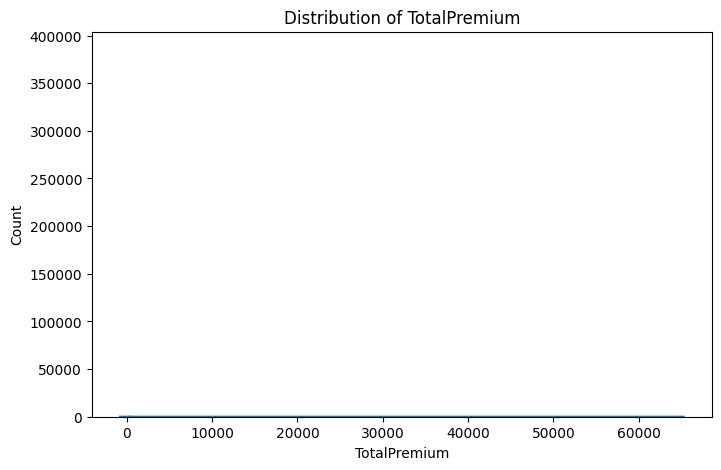

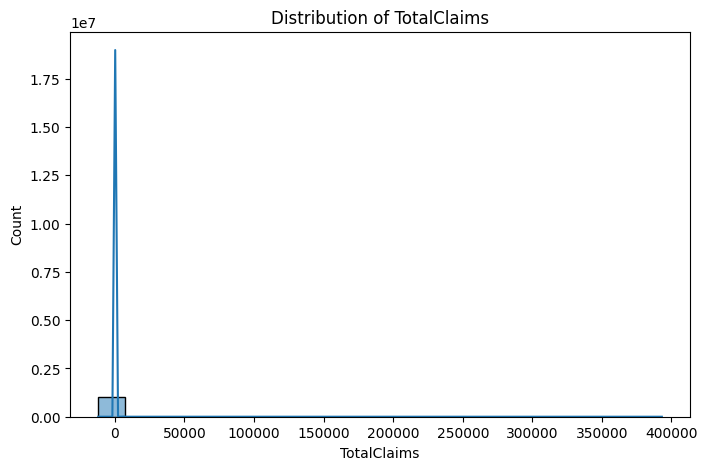

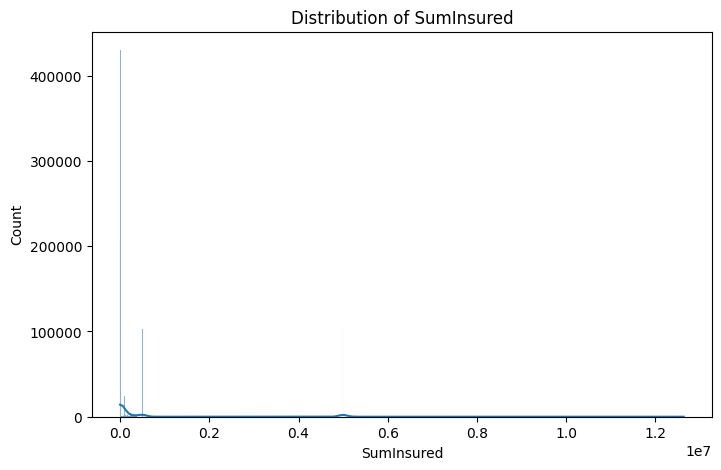

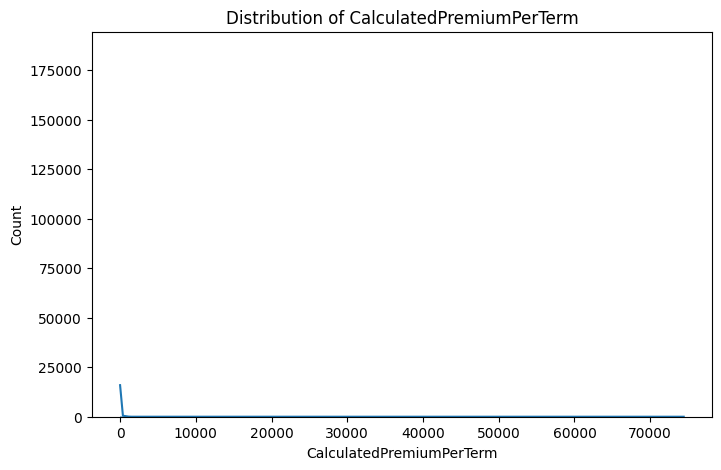

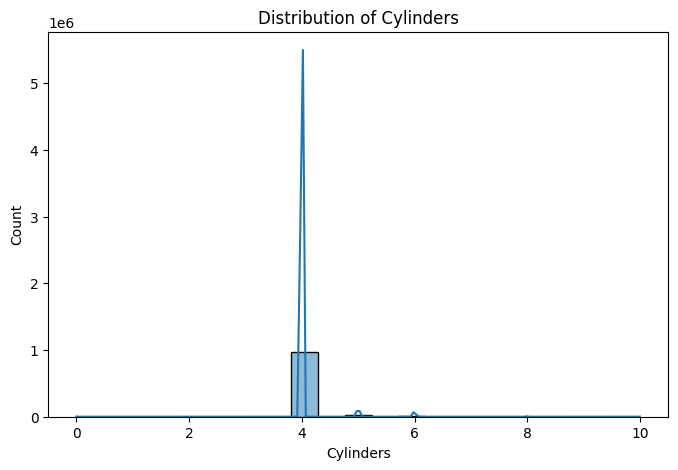

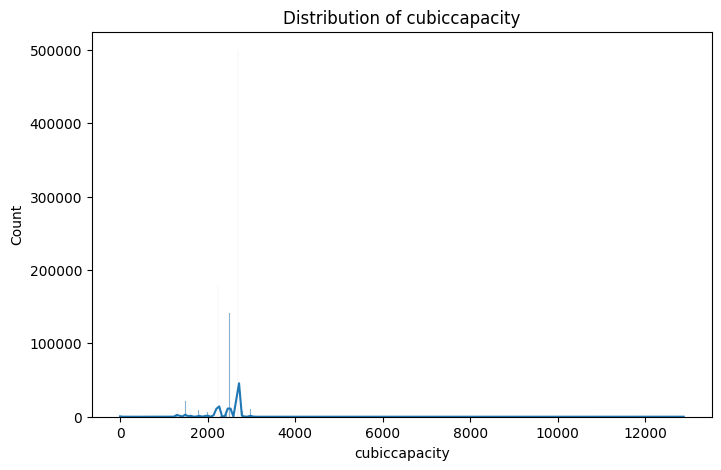

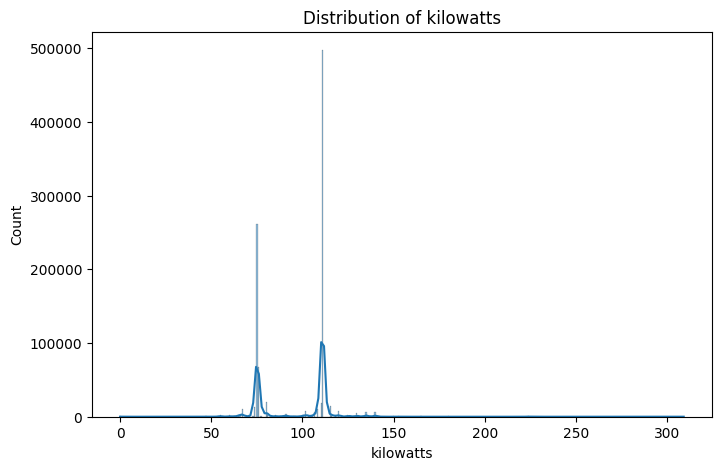

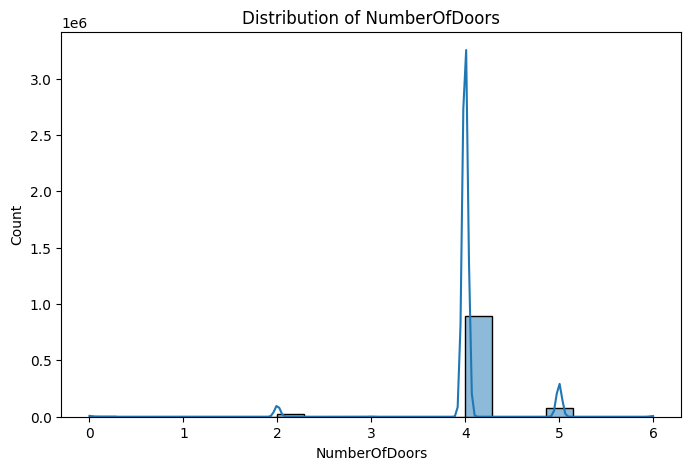

In [26]:
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.savefig(f'../reports/hist_{col}.png')
    plt.show()

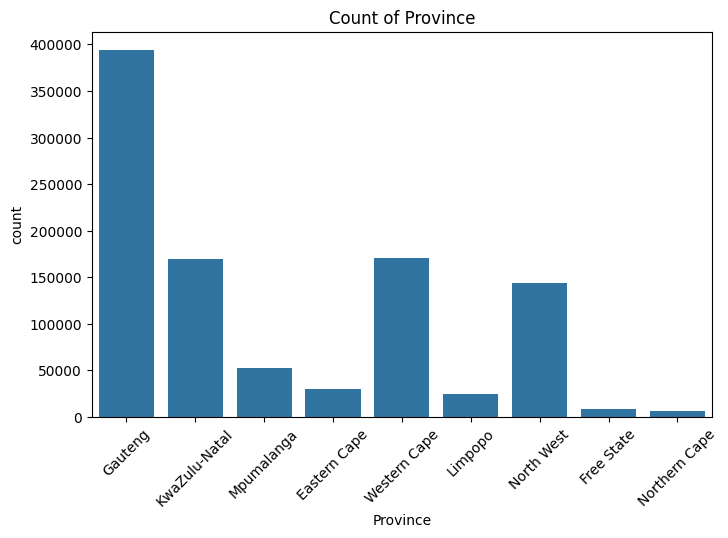

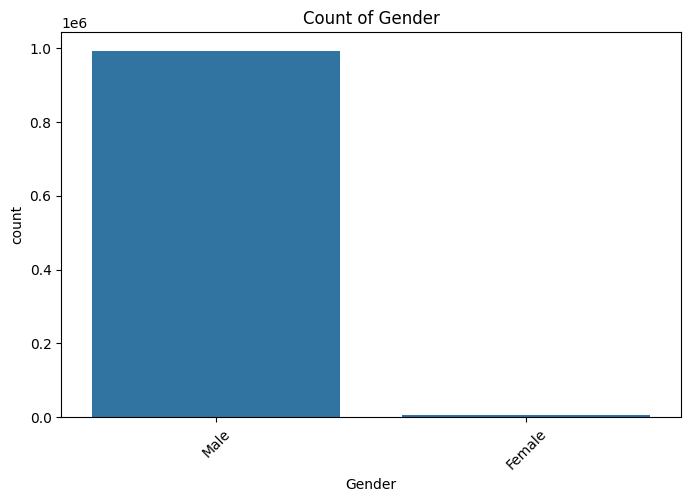

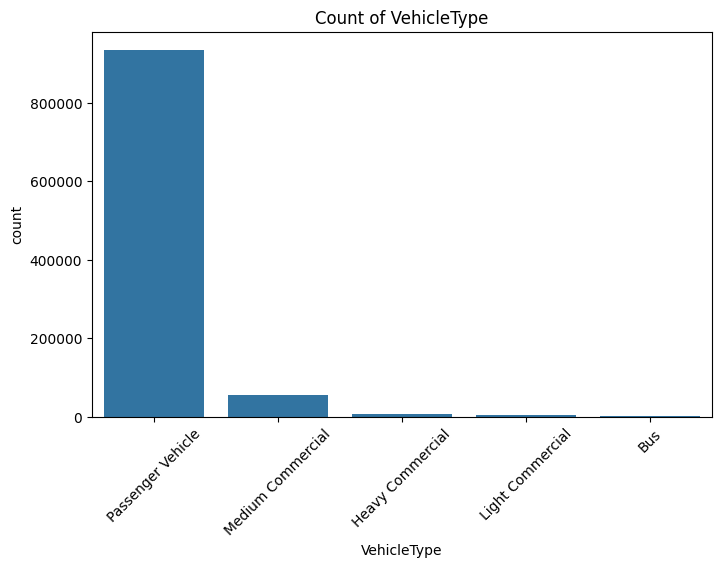

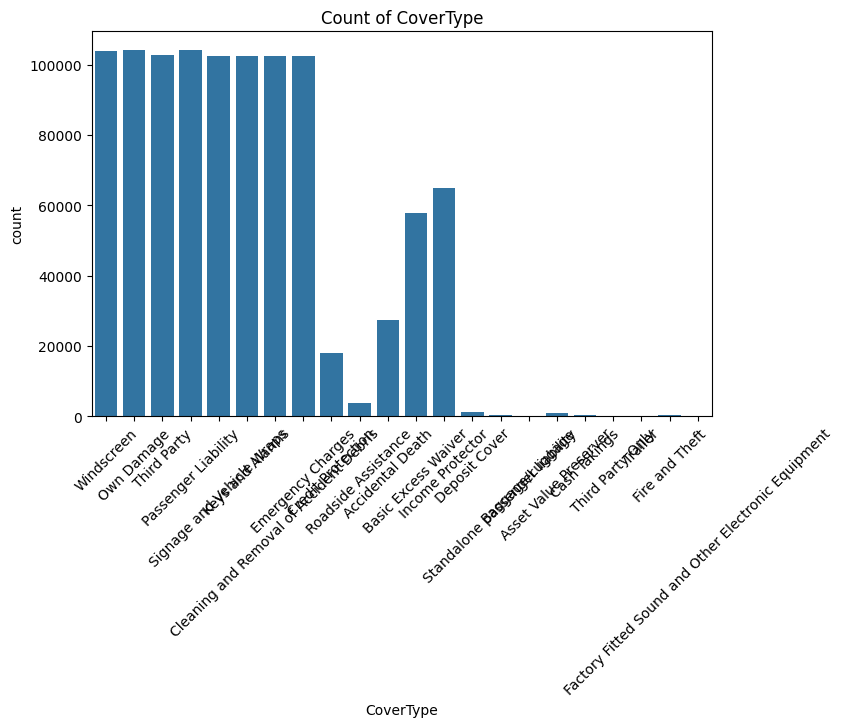

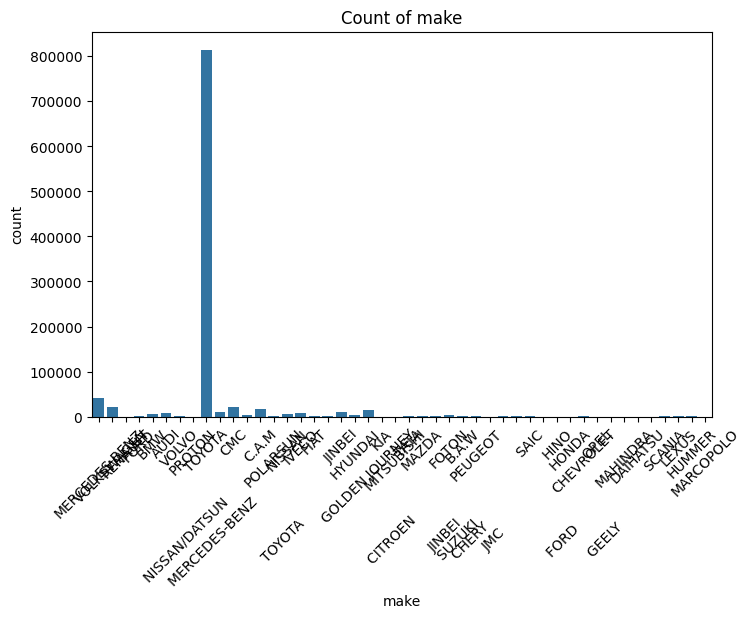

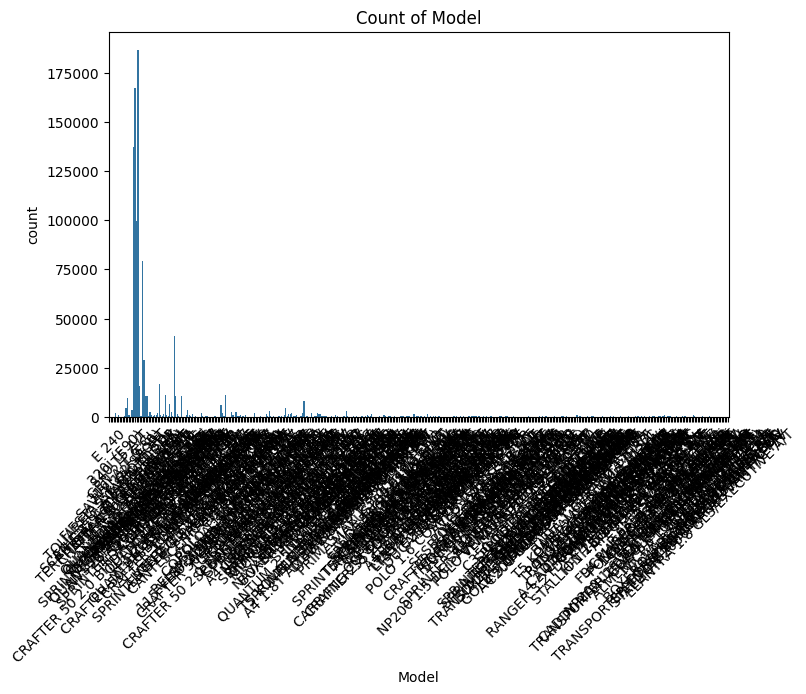

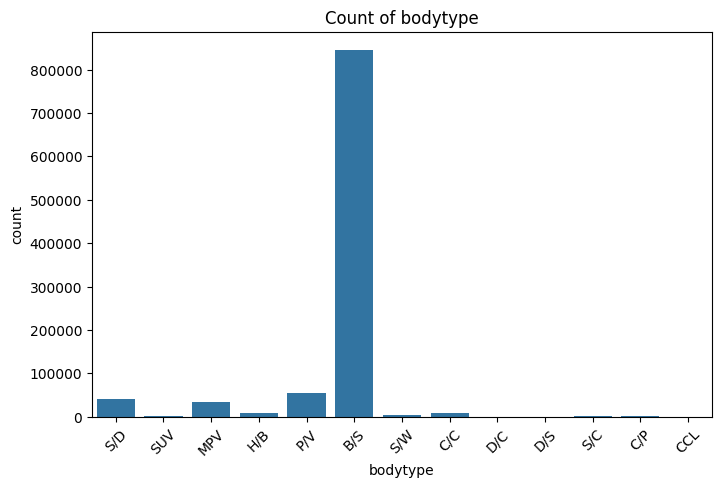

In [11]:
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=col)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.savefig(f'../reports/bar_{col}.png')
    plt.show()

### Bivariate Analysis

#### calculate the loss ratio

In [14]:
df['LossRatio'] = df['TotalClaims'] / df['TotalPremium'].replace(0, np.nan)
print("Overall Loss Ratio:", df['LossRatio'].mean())

Overall Loss Ratio: 0.3498846581363078


#### Analyze Loss Ratio by Province, VehicleType, and Gende

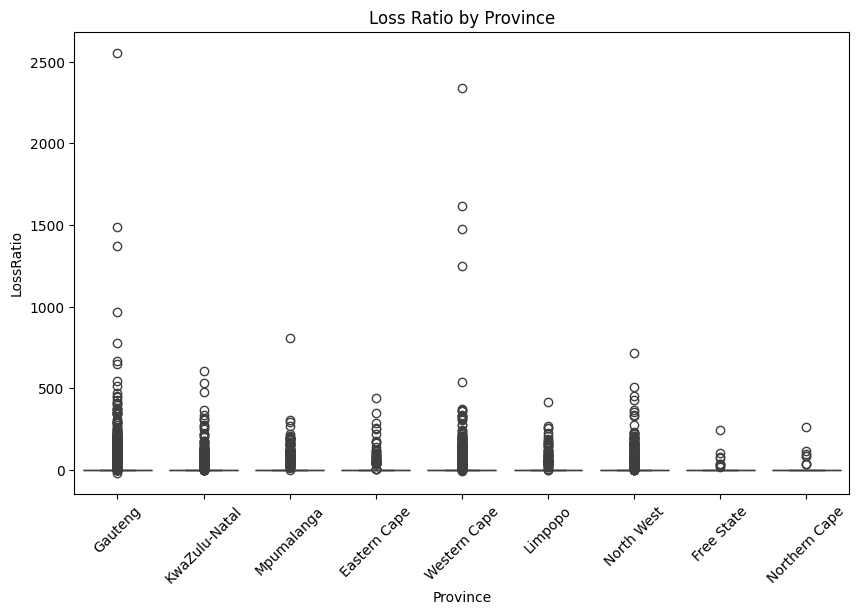

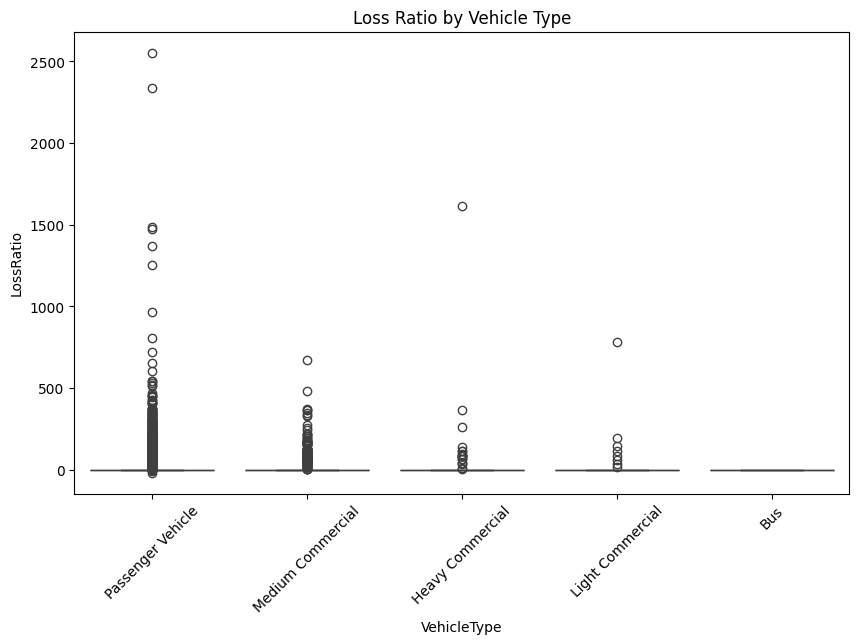

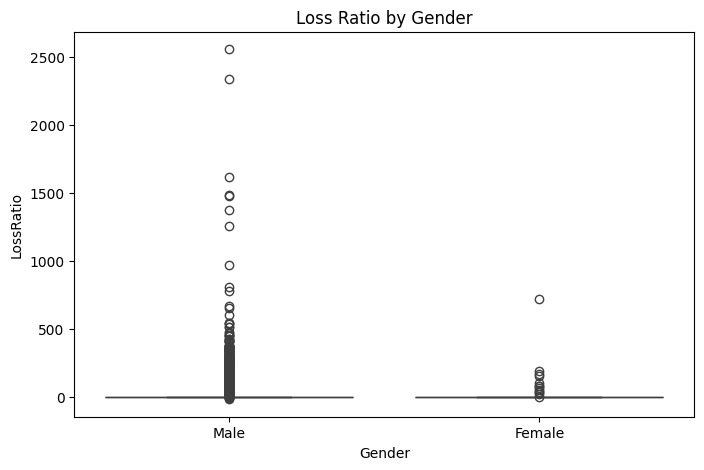

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Province', y='LossRatio')
plt.title('Loss Ratio by Province')
plt.xticks(rotation=45)
plt.savefig('../reports/loss_ratio_province.png')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='VehicleType', y='LossRatio')
plt.title('Loss Ratio by Vehicle Type')
plt.xticks(rotation=45)
plt.savefig('../reports/loss_ratio_vehicle.png')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Gender', y='LossRatio')
plt.title('Loss Ratio by Gender')
plt.savefig('../reports/loss_ratio_gender.png')
plt.show()

#### Correlation Matrix

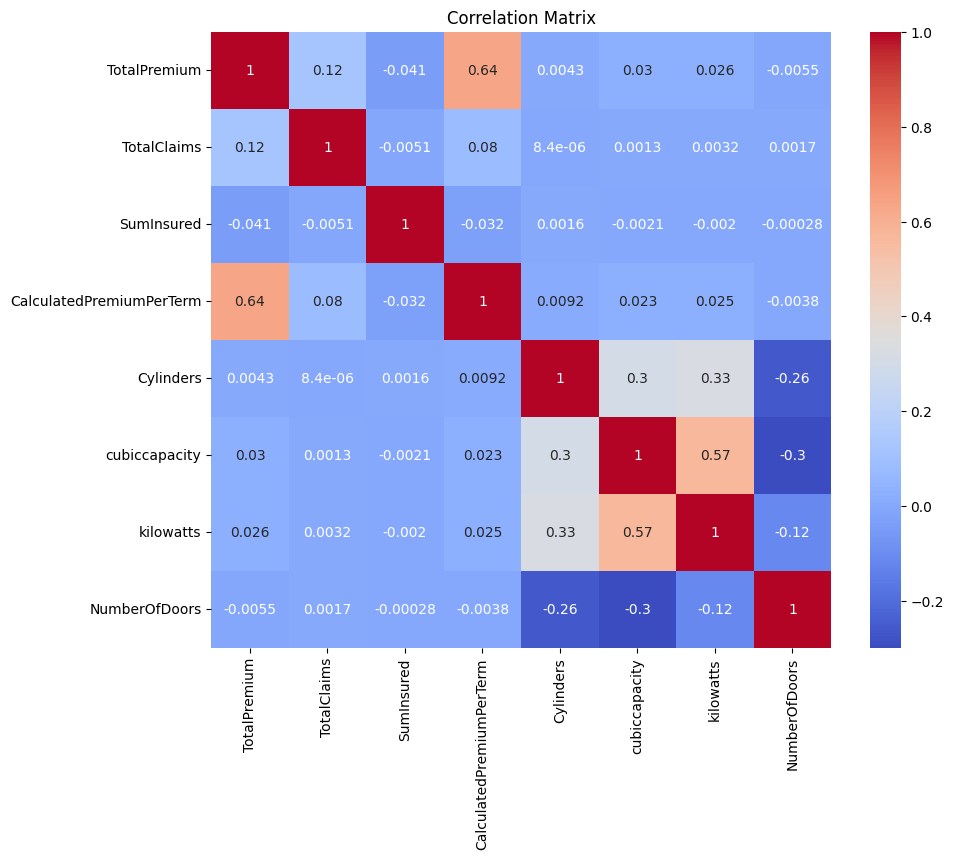

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig('../reports/correlation_matrix.png')
plt.show()

### Data Comparison

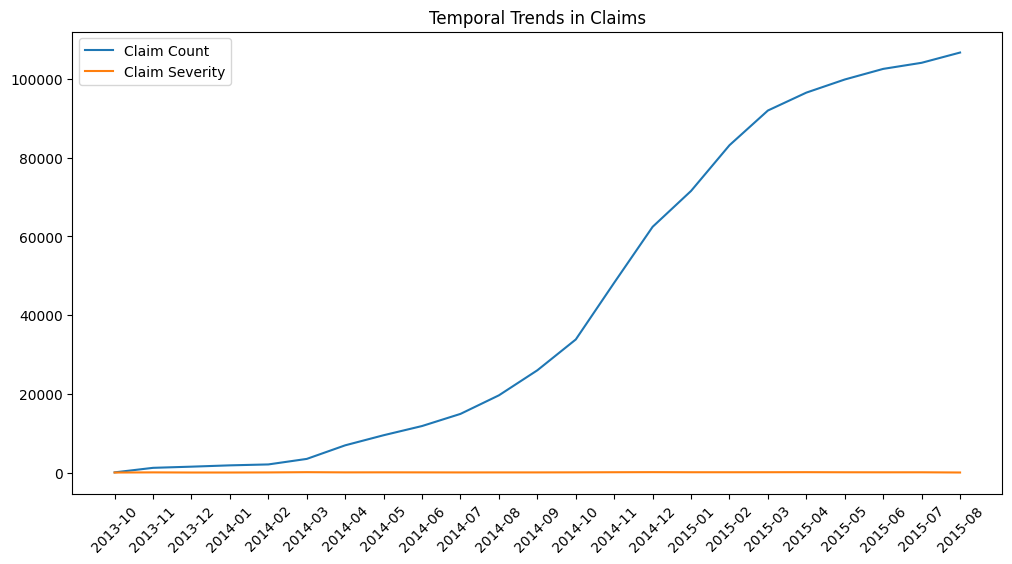

In [19]:
df['YearMonth'] = df['TransactionMonth'].dt.to_period('M')
monthly_trends = df.groupby('YearMonth').agg({
    'TotalClaims': ['count', 'mean'],
    'TotalPremium': 'mean'
}).reset_index()
monthly_trends.columns = ['YearMonth', 'ClaimCount', 'ClaimSeverity', 'Avg BESPOKE']
monthly_trends['YearMonth'] = monthly_trends['YearMonth'].astype(str)

plt.figure(figsize=(12, 6))
plt.plot(monthly_trends['YearMonth'], monthly_trends['ClaimCount'], label='Claim Count')
plt.plot(monthly_trends['YearMonth'], monthly_trends['ClaimSeverity'], label='Claim Severity')
plt.title('Temporal Trends in Claims')
plt.xticks(rotation=45)
plt.legend()
plt.savefig('../reports/temporal_trends.png')
plt.show()

### Outlier Detection

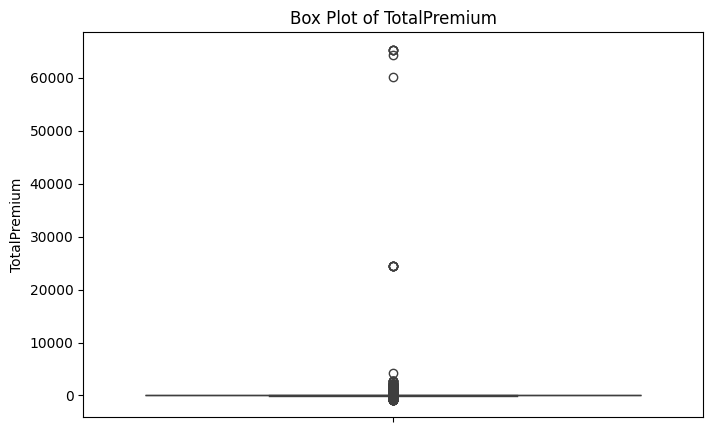

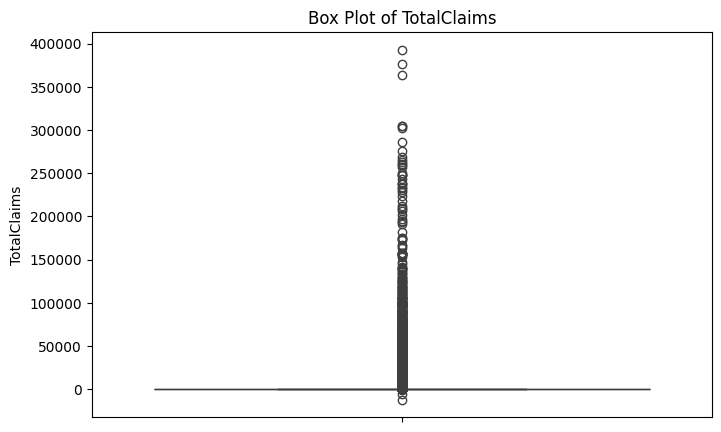

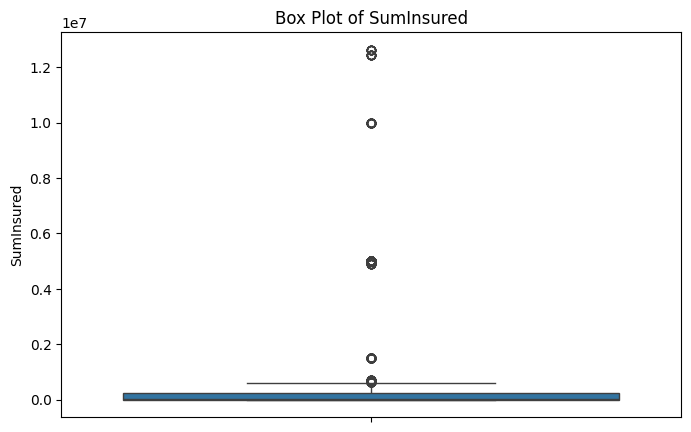

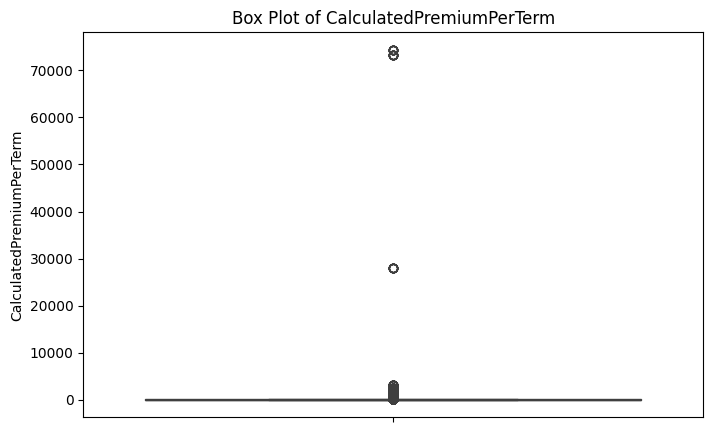

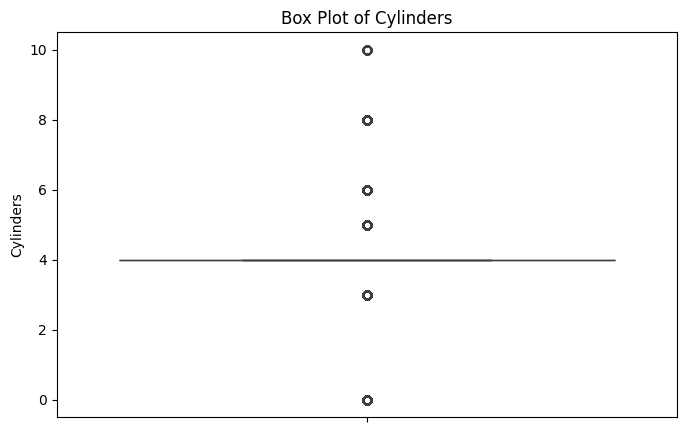

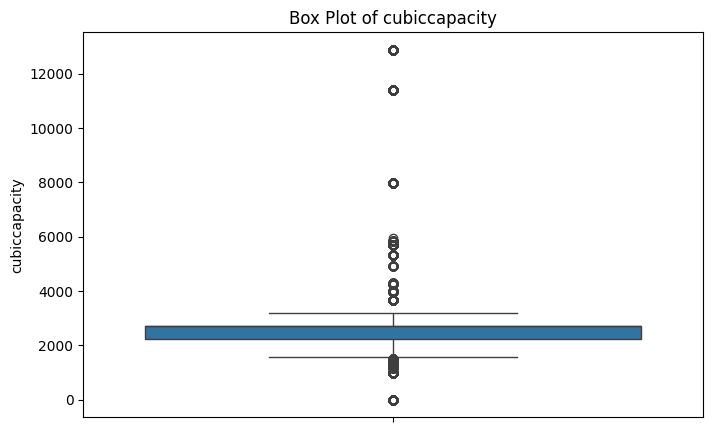

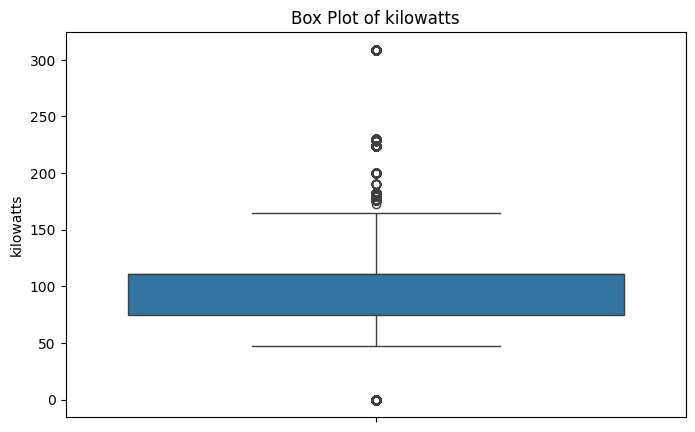

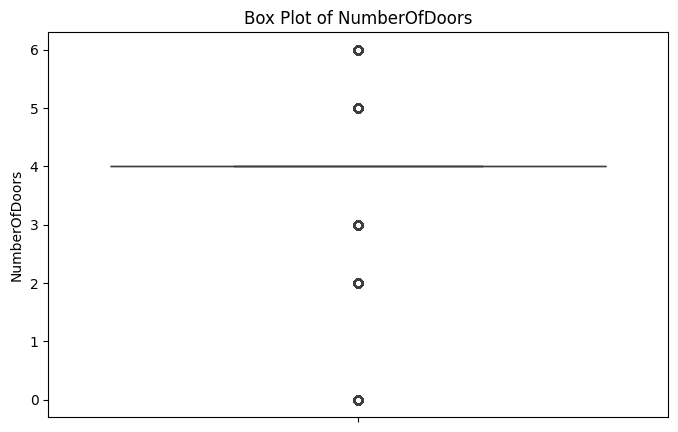

In [20]:
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, y=col)
    plt.title(f'Box Plot of {col}')
    plt.savefig(f'../reports/boxplot_{col}.png')
    plt.show()

### Visualizations

#### Loss Ratio by Province and Gender

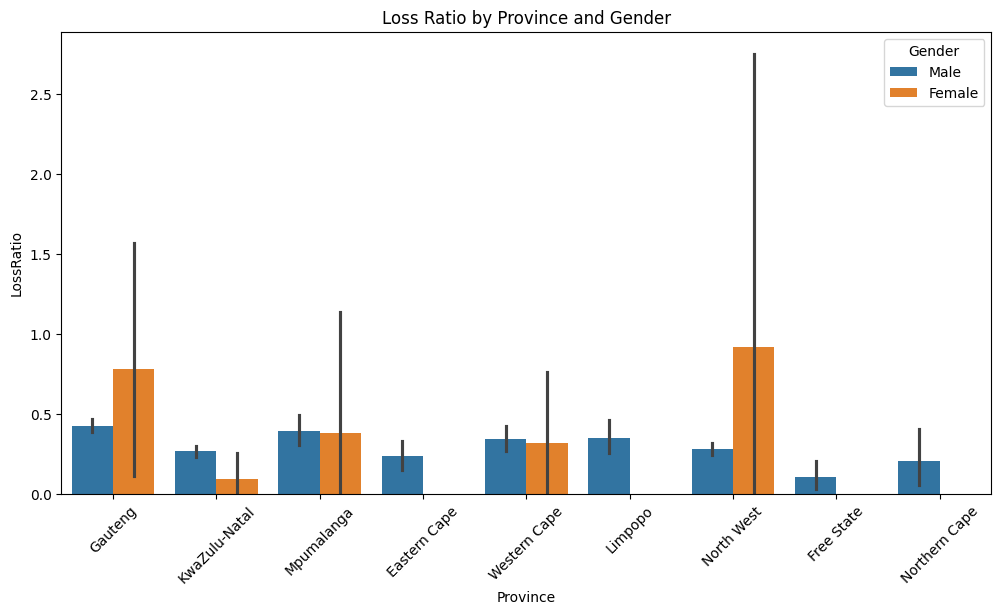

In [21]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Province', y='LossRatio', hue='Gender')
plt.title('Loss Ratio by Province and Gender')
plt.xticks(rotation=45)
plt.savefig('../reports/loss_ratio_province_gender.png')
plt.show()

#### Claim Severity by Vehicle Make

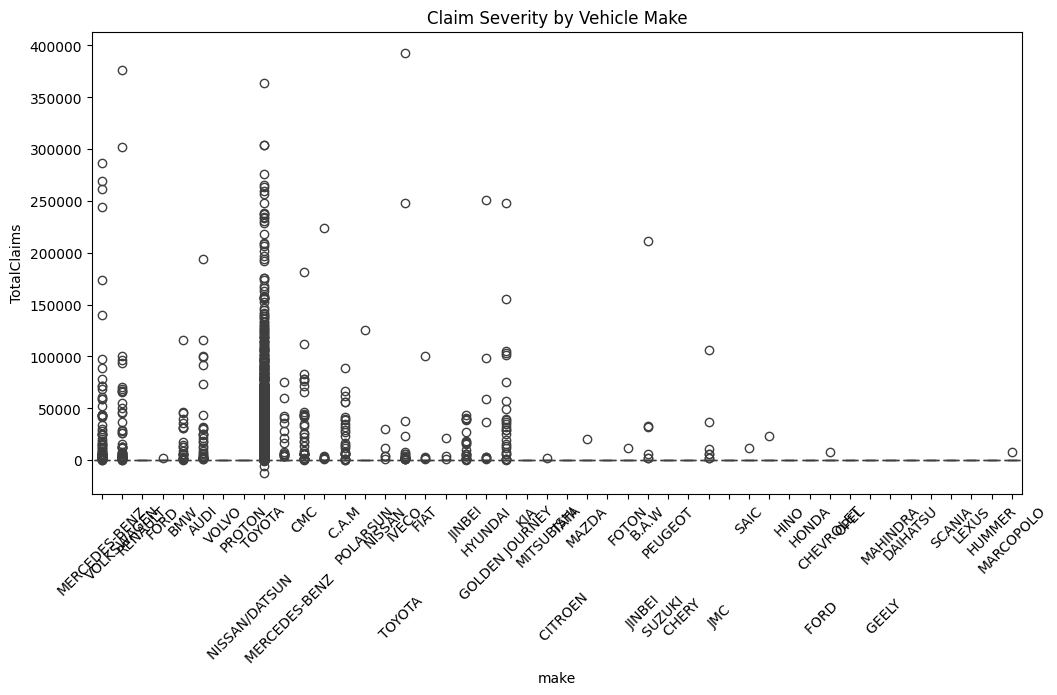

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='make', y='TotalClaims')
plt.title('Claim Severity by Vehicle Make')
plt.xticks(rotation=45)
plt.savefig('../reports/claim_severity_make.png')
plt.show()

#### Premium vs. Claims Scatter

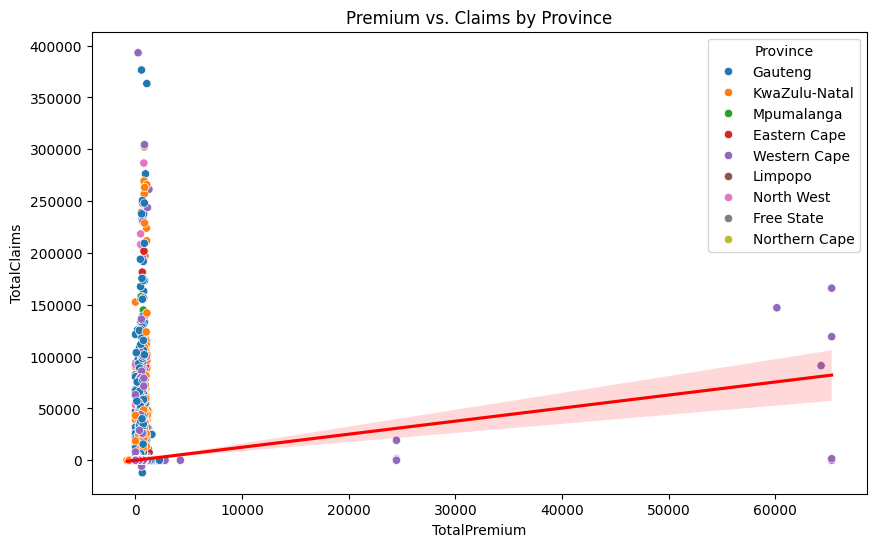

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TotalPremium', y='TotalClaims', hue='Province')
sns.regplot(data=df, x='TotalPremium', y='TotalClaims', scatter=False, color='red')
plt.title('Premium vs. Claims by Province')
plt.savefig('../reports/premium_vs_claims.png')
plt.show()